<a href="https://colab.research.google.com/github/ShiftLove/Alx-Software-Engineering-Start/blob/main/Music%20Recommendation%20System%200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
files.upload()

Saving spotify_tracks.csv.zip to spotify_tracks.csv.zip


In [11]:
!unzip spotify_tracks.csv.zip

Archive:  spotify_tracks.csv.zip
  inflating: spotify_tracks.csv      


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [16]:
songs_df = pd.read_csv('/content/spotify_tracks.csv')


In [17]:
songs_df.head()

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90f69ccc10>,
      dtype=object)

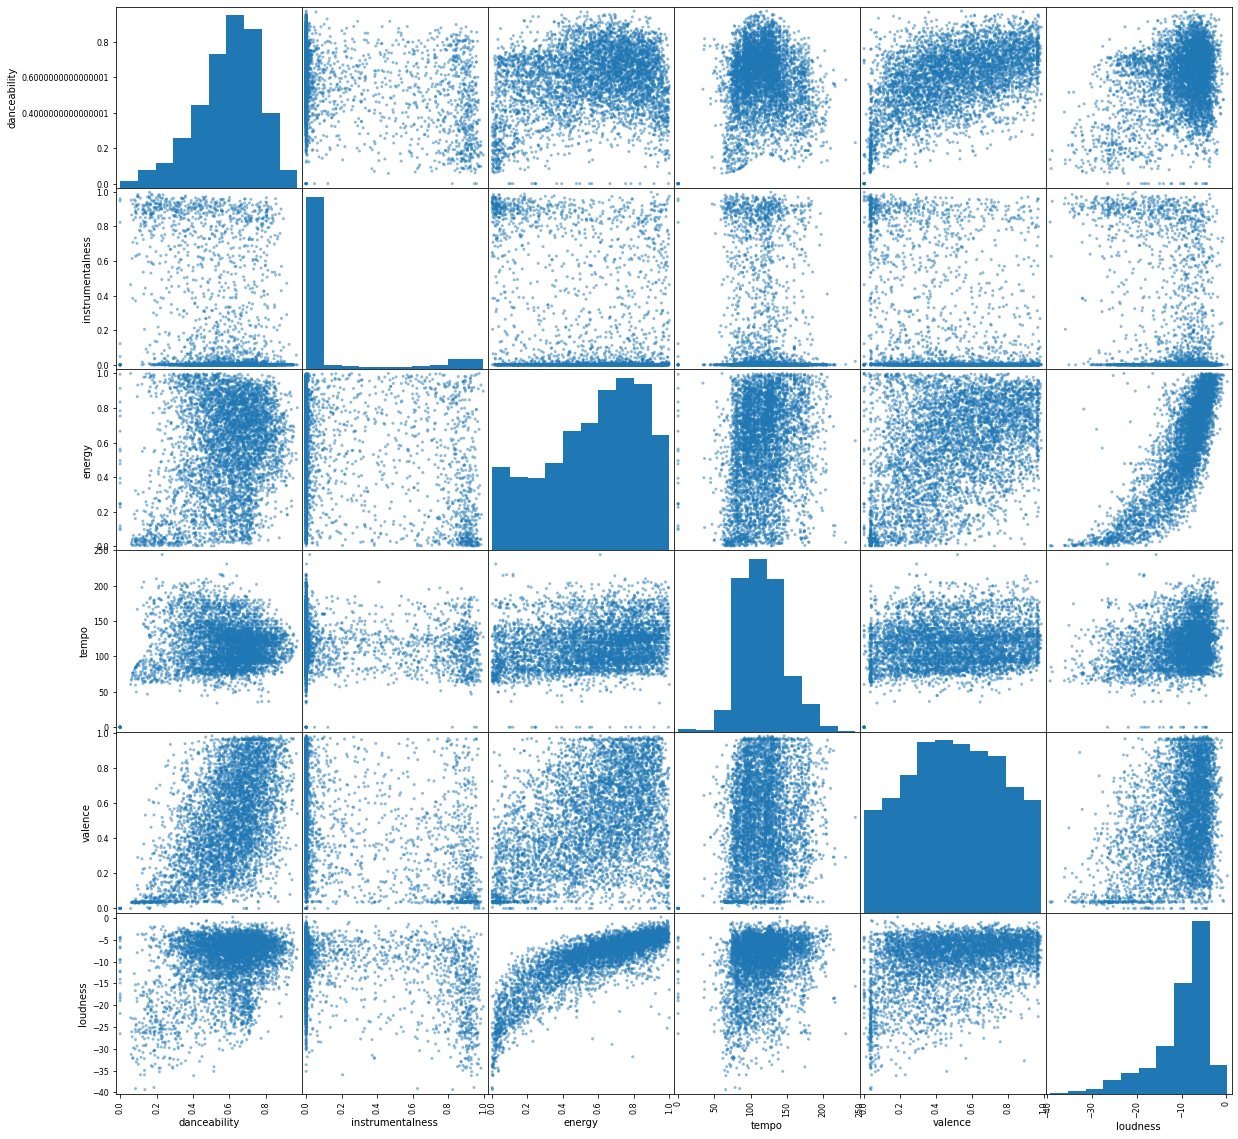

In [78]:
#REDUCE DATASET TO 5000 DATA POINTS QUICK PROCESSING
sliced_df= songs_df[:5000]
pd.plotting.scatter_matrix(sliced_df[['danceability','instrumentalness','energy','tempo','valence','loudness']],figsize=(20,20))

In [75]:
sliced_df.corr()

,Unnamed: 0,acousticness,danceability,disc_number,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,time_signature,track_number,valence,type,song_type
Unnamed: 0,1.000000,-0.030906,0.026523,-0.009223,-0.012470,0.021046,-0.000240,-0.002134,-0.030715,0.042044,-0.009404,0.160131,-0.049428,0.009698,0.030192,-0.034371,0.000195,0.013521,0.013521
acousticness,-0.030906,1.000000,-0.270211,0.045242,0.090509,-0.715392,0.209567,-0.017941,-0.028647,-0.583019,0.064972,-0.154408,0.159875,-0.200139,-0.183867,0.143257,-0.250675,0.030263,0.030263
danceability,0.026523,-0.270211,1.000000,-0.012023,-0.086851,0.249542,-0.286676,0.037420,-0.073848,0.345126,-0.072409,0.092382,0.159351,0.013437,0.217772,-0.064259,0.524972,0.081504,0.081504
disc_number,-0.009223,0.045242,-0.012023,1.000000,0.047136,-0.049685,0.000116,-0.001945,0.001004,-0.059239,0.005703,-0.047331,0.049431,-0.008285,-0.009851,0.008616,-0.010502,0.007639,0.007639
duration_ms,-0.012470,0.090509,-0.086851,0.047136,1.000000,-0.126551,0.073644,0.001055,-0.005047,-0.179745,0.007642,-0.169125,0.165064,-0.041579,-0.019498,-0.047087,-0.122258,0.046907,0.046907
energy,0.021046,-0.715392,0.249542,-0.049685,-0.126551,1.000000,-0.257773,0.026583,0.172516,0.779383,-0.057694,0.153979,-0.128948,0.221748,0.207738,-0.144985,0.406321,-0.047535,-0.047535
instrumentalness,-0.000240,0.209567,-0.286676,0.000116,0.073644,-0.257773,1.000000,-0.016874,-0.092166,-0.422938,-0.025847,-0.041537,-0.156240,-0.066160,-0.067691,0.013713,-0.313378,0.087671,0.087671
key,-0.002134,-0.017941,0.037420,-0.001945,0.001055,0.026583,-0.016874,1.000000,-0.002553,0.027228,-0.161642,-0.000641,0.012358,-0.003031,0.014253,-0.012974,0.034900,0.004074,0.004074
liveness,-0.030715,-0.028647,-0.073848,0.001004,-0.005047,0.172516,-0.092166,-0.002553,1.000000,0.045502,0.016981,-0.059116,0.235548,-0.018263,-0.029223,0.107376,0.033650,-0.007441,-0.007441
loudness,0.042044,-0.583019,0.345126,-0.059239,-0.179745,0.779383,-0.422938,0.027228,0.045502,1.000000,-0.030646,0.239679,-0.234375,0.228437,0.246167,-0.209343,0.377844,-0.063495,-0.063495


In [27]:
#Create Clusters
model = KMeans(n_clusters=6)
model.fit(songs_df[['danceability','instrumentalness','energy','tempo','valence','loudness']])

KMeans(n_clusters=6)

In [29]:
print(model.labels_[:12], '\n\n', min(model.labels_),max(model.labels_))

[5 5 4 5 4 4 4 4 4 4 5 4] 

 0 5


In [71]:
songs_df['song_type'] = model.labels_
songs_df.head(10)


,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type,song_type
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,5,5
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,5,5
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,4,4
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,5,5
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,4,4
5,5,0.971,7CCwkPweMxKq8yWkVerH6T,https://api.spotify.com/v1/audio-analysis/4PrA...,['3kzwYV3OCB010YfXMF0Avt'],"['AE', 'AR', 'BH', 'BO', 'BR', 'CL', 'CO', 'CR...",BE,0.367,1.0,183653.0,...,0.0268,81.850,4.0,https://api.spotify.com/v1/tracks/4PrAZpH9Ic7S...,track_23,8.0,spotify:track:4PrAZpH9Ic7S47E78BN6E4,0.1920,4,4
6,6,0.824,51g5viCaYjOW5XO4qX1RCD,https://api.spotify.com/v1/audio-analysis/1WJz...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.688,1.0,29240.0,...,0.5310,77.056,3.0,https://api.spotify.com/v1/tracks/1WJzRtI1ABzV...,track_9,2.0,spotify:track:1WJzRtI1ABzV3TPIeJZVvi,0.4140,4,4
7,7,0.719,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/6ile...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.513,1.0,591160.0,...,0.9340,89.024,4.0,https://api.spotify.com/v1/tracks/6ileHaSaGI8U...,track_11,11.0,spotify:track:6ileHaSaGI8UjUK1jQu6jm,0.2280,4,4
8,8,0.752,1UMRkrYSzqH3tH3yCauNOW,https://api.spotify.com/v1/audio-analysis/6rlE...,"['5uNTrZ1JlKsnpTeFyKWPYO', '3pZ60MK5NPuXtBVJx1...","['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.629,1.0,753947.0,...,0.9470,85.173,4.0,https://api.spotify.com/v1/tracks/6rlEcNrUCujt...,track_12,6.0,spotify:track:6rlEcNrUCujtmQK0EDvcp2,0.4830,4,4
9,9,0.690,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/00up...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.529,1.0,573280.0,...,0.9380,86.335,4.0,https://api.spotify.com/v1/tracks/00upOxUCEPl1...,track_6,6.0,spotify:track:00upOxUCEPl1CMr1axg52f,0.2140,4,4


In [38]:
songs_df.to_csv('../result')

In [40]:
#Constructing own logic
songs = pd.read_csv('../result')


,Unnamed: 0,Unnamed: 0.1,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,...,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type,song_type
0,0,0,0.294000,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,5,5
1,1,1,0.863000,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,5,5
2,2,2,0.750000,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,4,4
3,3,3,0.763000,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,5,5
4,4,4,0.770000,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,101934,101934,0.005640,1M9n4vCmOH4lbcHrpt21Qy,https://api.spotify.com/v1/audio-analysis/4e5w...,['6n3YUZcayLRuAunJUUelvz'],"['AU', 'NZ']",AR,0.602,1.0,...,0.0327,130.186,4.0,https://api.spotify.com/v1/tracks/4e5wI6VC4eVD...,track_10,4.0,spotify:track:4e5wI6VC4eVDTtpyZ409Pw,0.7870,5,5
101935,101935,101935,0.000406,511p6iaCuK8Sr0BYdpcfkq,https://api.spotify.com/v1/audio-analysis/58nH...,['4iudEcmuPlYNdbP3e1bdn1'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.177,1.0,...,0.0604,184.260,4.0,https://api.spotify.com/v1/tracks/58nHFSWj5N5J...,track_16,7.0,spotify:track:58nHFSWj5N5JxNtWgS85TL,0.3630,3,3
101936,101936,101936,0.004510,511p6iaCuK8Sr0BYdpcfkq,https://api.spotify.com/v1/audio-analysis/2RDg...,['4iudEcmuPlYNdbP3e1bdn1'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.539,1.0,...,0.0653,118.043,4.0,https://api.spotify.com/v1/tracks/2RDgs05sg2vr...,track_21,2.0,spotify:track:2RDgs05sg2vrpwiAEUkWd0,0.4060,5,5
101937,101937,101937,0.333000,7H3Bgvb3hs4vvLwccHDRlr,https://api.spotify.com/v1/audio-analysis/1pXt...,['023YMawCG3OvACmRjWxLWC'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",AR,0.716,1.0,...,0.1510,110.015,4.0,https://api.spotify.com/v1/tracks/1pXtUVmSS3Ak...,track_26,5.0,spotify:track:1pXtUVmSS3Aky3j6nQ4sQT,0.7600,2,2


In [96]:
ids = input ('Enter comma-seprated IDs of favorite songs\n> ').strip().split(',')

Enter comma-seprated IDs of favorite songs
> 7H3Bgvb3hs4vvLwccHDRlr,3oieBBYbUOve0VpxTCpHr1, 1M9n4vCmOH4lbcHrpt21Qy,4tKijjmxGClg4JOLAyo2qE,1bcqsH5UyTBzmh9YizdsBE,6FeJF5r8roonnKraJxr4oB


In [91]:
#Search Specified IDs in this dataset and get the songs
favorites = songs[songs.id.isin(ids)]

In [92]:
#Code to sort out the max occuring cluster number according to user's favorite tracks
cluster_numbers = list(favorites['song_type'])
clusters = {}
for num in cluster_numbers:
  clusters[num] = cluster_numbers.count(num)

In [105]:
#Sort Cluster numbers and find out the numbers that occur the most
user_favorite_cluster = [(k, v) for k, v in sorted(clusters.items(), key=lambda item: item[1][0][0])]


In [100]:
print('\nFavorite cluster: ', user_favorite_cluster, '\n')


Favorite cluster:  [] 



In [ ]:
#Finally get the tracks of that cluster
recommendation = songs[songs.song_type == user_favorite_cluster]